In [2]:
# CPSC 424 Assignment 5 Question 1
#
# Script that tests the subdivide function.
#
# Your task for this question is to implement subdivide().

In [10]:
# Include packages
using Plots

In [35]:
# ====================================================
# function [x, y] = subdivide(xcoords, ycoords, niters, scheme, move2limit)
#
# This function subdivides the given control polygon `niters` times according to 
# the requested subdivision scheme.  Finally, each point is moved to
# the limit curve using Eigen-analysis.
#
# xcoords and ycoords are the x- and y-coordinates of the control points.
# niters is the number of subdivision iterations to perform.
# scheme specifies the scheme to use:
#   if scheme == 1, use the 1/8 1/8 3/4 (Cubic) subdivision scheme
#   if scheme == 2, use the 1/7 1/7 5/7 subdivision scheme
# move2limit specifies whether the points should be moved to their
#            limit positions after subdivision.
function subdivide(xcoords, ycoords, niters, scheme, move2limit)
    # YOUR IMPLEMENTATION GOES HERE
    a = length(xcoords)
    fxcoordinates =[]
    fycoordinates =[]
    if(scheme == 1)
        matrix = ([[0.5 0.5 0];[0.125 0.75 0.125];[0 0.5 0.5]])^niters       
    end
    if(scheme ==2)
        matrix = ([[0.5 0.5 0];[(1/7) (5/7) (1/7)];[0 0.5 0.5]])^niters        
    end
    
    points3x = [xcoords[end-1];xcoords[end];xcoords[1]]
    points3y = [ycoords[end-1];ycoords[end];ycoords[1]]
        for j in 1:3
            push!(fxcoordinates,(matrix[j,:]')*points3x)
            push!(fycoordinates,(matrix[j,:]')*points3y)
        end
    
    points3x = [xcoords[end];xcoords[1];xcoords[2]]
    points3y = [ycoords[end];ycoords[1];ycoords[2]]
        for j in 1:3
            push!(fxcoordinates,(matrix[j,:]')*points3x)
            push!(fycoordinates,(matrix[j,:]')*points3y)
        end
    
    for i in 2:(a-1)
        points3x = [xcoords[(i-1)];xcoords[i];xcoords[(i+1)]]
        points3y = [ycoords[(i-1)];ycoords[i];ycoords[(i+1)]]
        for j in 1:3
            push!(fxcoordinates,(matrix[j,:]')*points3x)
            push!(fycoordinates,(matrix[j,:]')*points3y)
        end
    end
    
    
    
    xcoords = fxcoordinates 
    ycoords = fycoordinates
    
    xcoords,ycoords
end

subdivide (generic function with 1 method)

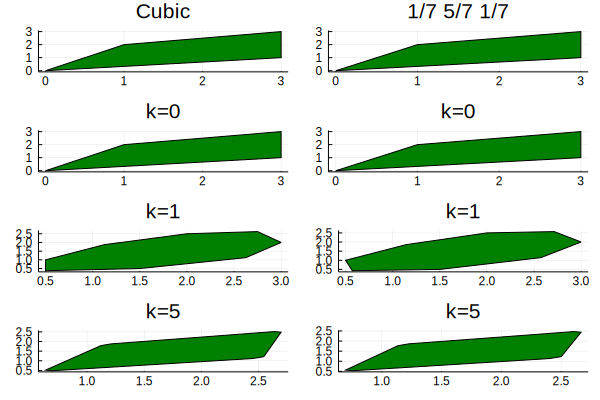

In [36]:
# ====================================================
#                Polygon 1
# ====================================================


# ================= set the control points
x1 = [0, 1, 3, 3]
y1 = [0, 2, 3, 1]

# ================= Draw scheme 1
p1 = plot(Shape(x1, y1), color = :green, title="Cubic")

x, y = subdivide(x1, y1, 0, 1, 0)
p2 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 1, 0)
p3 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 1, 0)
p4 = plot(Shape(x, y), color = :green, title="k=5")

# ================= Draw scheme 2
p5 = plot(Shape(x1, y1), color = :green, title="1/7 5/7 1/7")

x, y = subdivide(x1, y1, 0, 2, 0)
p6 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 2, 0)
p7 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 2, 0)
p8 = plot(Shape(x, y), color = :green, title="k=5")


plot(p1,p5,p2,p6,p3,p7,p4,p8,layout=(4,2),legend=false)

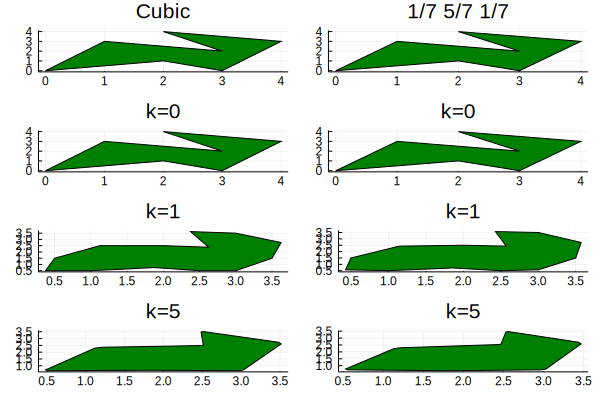

In [37]:
# ====================================================
#                Polygon 2
# ====================================================


# ================= set the control points

x1 = [0, 1, 3, 2, 4, 3, 2]
y1 = [0, 3, 2, 4, 3, 0, 1]

# ================= Draw scheme 1
p1 = plot(Shape(x1, y1), color = :green, title="Cubic")

x, y = subdivide(x1, y1, 0, 1, 0)
p2 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 1, 0)
p3 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 1, 0)
p4 = plot(Shape(x, y), color = :green, title="k=5")

# ================= Draw scheme 2
p5 = plot(Shape(x1, y1), color = :green, title="1/7 5/7 1/7")

x, y = subdivide(x1, y1, 0, 2, 0)
p6 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 2, 0)
p7 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 2, 0)
p8 = plot(Shape(x, y), color = :green, title="k=5")


plot(p1,p5,p2,p6,p3,p7,p4,p8,layout=(4,2),legend=false)